In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.api import tools
from statsmodels.formula.api import ols
import scipy

In [3]:
df = pd.read_csv('../data/HR.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37.0,NaN,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


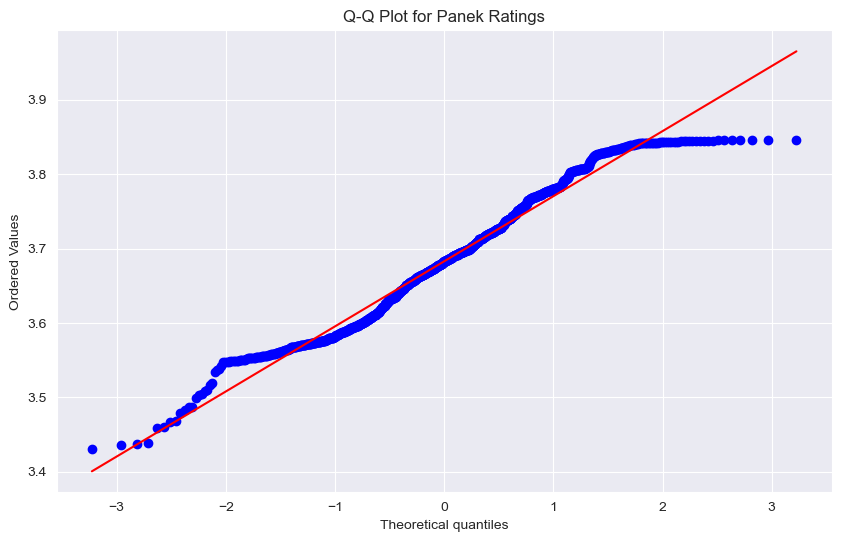

Result of Shapiro-Wilk test: ShapiroResult(statistic=0.9760816693305969, pvalue=1.5436434682575273e-12)


In [39]:
df = df.dropna()

df['MonthlyIncomeTrans'], _, _ = stats.boxcox(df['MonthlyIncome'], alpha=0.01)

# Q-Q plot for Panek ratings
plt.figure(figsize=(10, 6))
stats.probplot(df['MonthlyIncomeTrans'], dist=stats.norm, plot=plt)
plt.title("Q-Q Plot for Panek Ratings")
plt.show()

shapiro = stats.shapiro(df['MonthlyIncomeTrans'])
print(f"Result of Shapiro-Wilk test: {shapiro}")


In [41]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'MonthlyIncomeTrans'],
      dtype='object')


In [48]:
# Perform two-way ANOVA
model = ols('MonthlyIncomeTrans ~ OverTime', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print(anova_table)

            sum_sq      df         F    PR(>F)
OverTime  0.000039     1.0  0.004954  0.943903
Residual  8.616219  1103.0       NaN       NaN
